In [ ]:
print(__doc__)

import numpy as np
from sklearn.svm import SVR
%matplotlib inline
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

In [16]:
from get_log_data import read_logs, get_log_traintest,get_digitized_logdata, get_labelized_logdata
x_train, x_test, y_train, y_test, scaler_x, scaler_y=get_log_traintest('phit',True,False)

In [17]:
# x_train,
# y_train.shape=(y_train.shape[1],)
# y_train.shape

y_train=np.ravel(y_train)
y_train

array([0.339868, 0.325714, 0.310568, ..., 0.176432, 0.185291, 0.180158])

In [26]:
y_test.shape

(1887, 1)

In [33]:
# #############################################################################
# Fit regression model
# svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
# svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
# y_rbf = svr_rbf.fit(x_train, y_train).predict(x_test)
# y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(x_train, y_train)

In [22]:
y_pred=svr_poly.predict(x_test)

In [27]:
y_pred.shape=y_test.shape

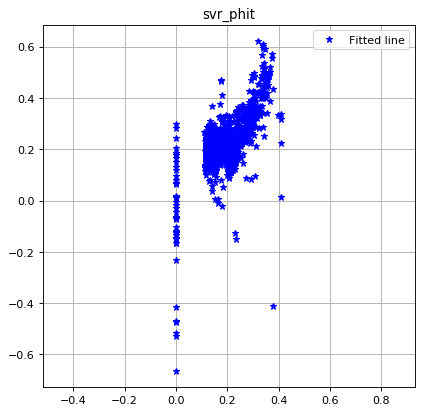

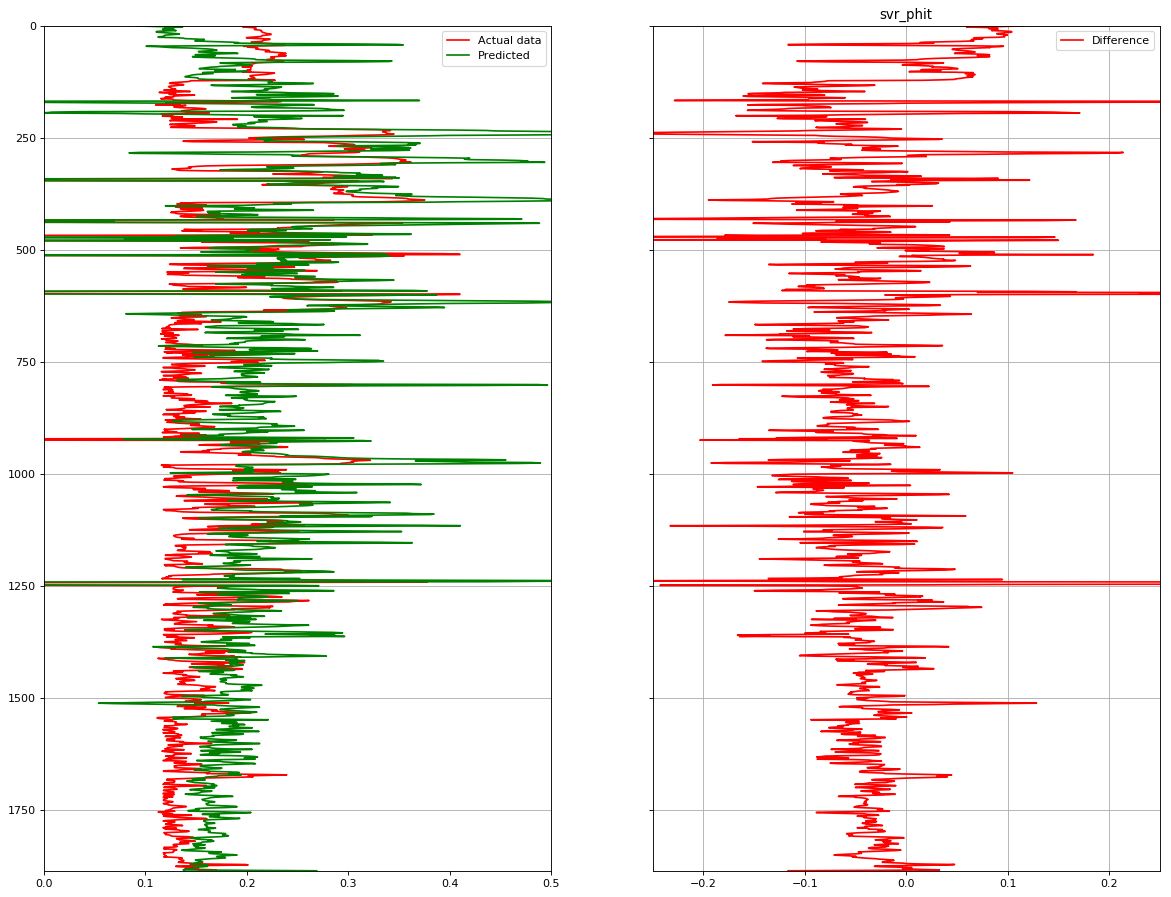

In [32]:
Y_train_inv=y_test
Y_pred_inv=y_pred
%matplotlib inline
from matplotlib import pyplot as plt
imname='svr_poly_phit'
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi= 80, sharey=True)
# with ax_ as ax1:
ax1.plot(Y_train_inv, Y_pred_inv,'b*', label='Fitted line')
ax1.legend()
ax1.axis('equal')
ax1.grid(True)
plt.title(imname)
plt.show() #5000 epochs, 1024

fig1.savefig(imname+'_scatter.png', dpi=100)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 14), dpi= 80, sharey=True)
i=0
perc_diff=(-Y_pred_inv+Y_train_inv)
for axes in ax:
    if(i==0):
        axes.plot( y_test,range(len(y_test)), label="Actual data",color='red')
#         axes.plot( Y_train_inv+0.02,range(len(Y_train_inv)), label="Actual data",color='red')
        axes.plot( Y_pred_inv,range(len(Y_pred_inv)), label="Predicted",color='green')
        axes.set_xlim (0,.5)
    else:
        axes.plot(perc_diff  ,range(len(perc_diff)), label="Difference",color='red')
        axes.set_xlim (-0.25,.25)
        axes.xaxis.grid(True)
#         axes.plot( Y_pred,range(len(Y_pred)), label="Predicted",color='green')
    i+=1
    axes.set_ylim (0,len(Y_train_inv))
    axes.legend()
    axes.invert_yaxis()
    axes.yaxis.grid(True)
plt.title(imname)
plt.show()  #5000 epochs, 1024
fig.savefig(imname+'_log.png', dpi=100)